In [ ]:
text = """Every single successful person who's achieved great things, whether it's climbing Mount Everest, whether it's getting to a top of a company, whether it's being the best athlete possible, they've all failed more times than they'll be able to remember. But through those lessons that they've learnt through those failures, that's how they've become great. No one's been great from the get go and then just being great. That's-- except for Superman, because he was just born great."""

In [ ]:

import nltk
nltk.download('punkt_tab')
token = nltk.word_tokenize(text)
print(token)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Every', 'single', 'successful', 'person', 'who', "'s", 'achieved', 'great', 'things', ',', 'whether', 'it', "'s", 'climbing', 'Mount', 'Everest', ',', 'whether', 'it', "'s", 'getting', 'to', 'a', 'top', 'of', 'a', 'company', ',', 'whether', 'it', "'s", 'being', 'the', 'best', 'athlete', 'possible', ',', 'they', "'ve", 'all', 'failed', 'more', 'times', 'than', 'they', "'ll", 'be', 'able', 'to', 'remember', '.', 'But', 'through', 'those', 'lessons', 'that', 'they', "'ve", 'learnt', 'through', 'those', 'failures', ',', 'that', "'s", 'how', 'they', "'ve", 'become', 'great', '.', 'No', 'one', "'s", 'been', 'great', 'from', 'the', 'get', 'go', 'and', 'then', 'just', 'being', 'great', '.', 'That', "'s", '--', 'except', 'for', 'Superman', ',', 'because', 'he', 'was', 'just', 'born', 'great', '.']


In [ ]:
token = nltk.sent_tokenize(text)
token

["Every single successful person who's achieved great things, whether it's climbing Mount Everest, whether it's getting to a top of a company, whether it's being the best athlete possible, they've all failed more times than they'll be able to remember.",
 "But through those lessons that they've learnt through those failures, that's how they've become great.",
 "No one's been great from the get go and then just being great.",
 "That's-- except for Superman, because he was just born great."]

In [ ]:
lower_ = [t.lower() for t in token]
print(lower_)

["every single successful person who's achieved great things, whether it's climbing mount everest, whether it's getting to a top of a company, whether it's being the best athlete possible, they've all failed more times than they'll be able to remember.", "but through those lessons that they've learnt through those failures, that's how they've become great.", "no one's been great from the get go and then just being great.", "that's-- except for superman, because he was just born great."]


In [ ]:
import re
cleaned = re.sub(r'[^a-zA-Z\s]', '', text)
print(cleaned)

Every single successful person whos achieved great things whether its climbing Mount Everest whether its getting to a top of a company whether its being the best athlete possible theyve all failed more times than theyll be able to remember But through those lessons that theyve learnt through those failures thats how theyve become great No ones been great from the get go and then just being great Thats except for Superman because he was just born great


In [ ]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

tokens = word_tokenize(text.lower())

fdist = FreqDist(tokens)

print(fdist.most_common(3))


[("'s", 7), (',', 6), ('great', 5)]


/tmp/ipython-input-3812981934.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=top_10, palette='magma')


       Word  Count
5         s      7
7     great      5
20     they      4
21       ve      3
9   whether      3
16    being      2
32  through      2
33    those      2
44     just      2
0     every      1


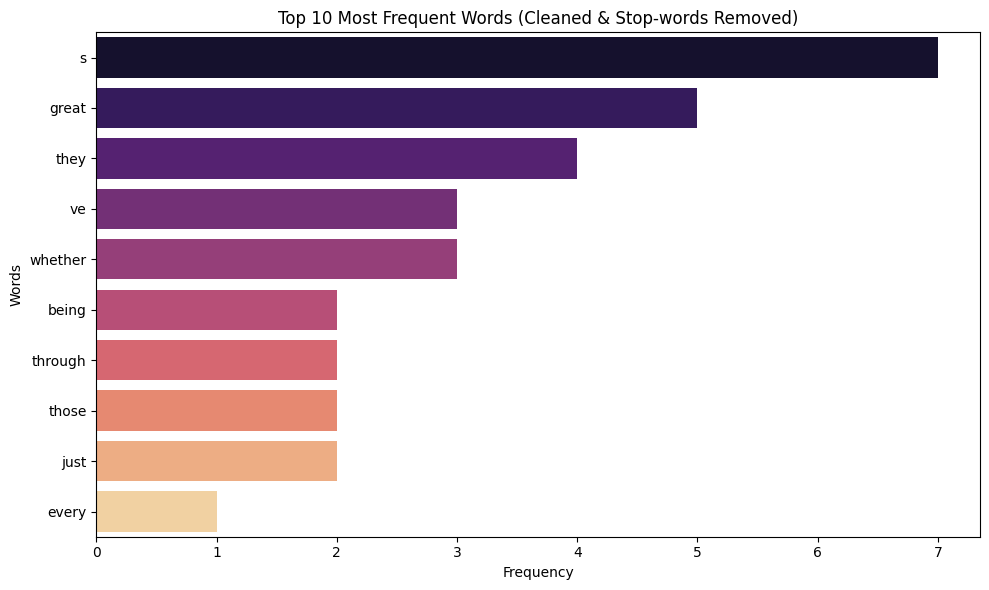

In [ ]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter


def clean_and_tokenize(text):
    text = text.lower()

    text = re.sub(r'[^a-z\s]', ' ', text)

    tokens = text.split()
    return tokens

tokens = clean_and_tokenize(text)


stop_words = {
    'is', 'a', 'of', 'and', 'the', 'with', 'between', 'in', 'to', 'how',
    'as', 'can', 'then', 'for', 'it', 'on', 'at', 'this', 'that'
}

filtered_tokens = [w for w in tokens if w not in stop_words]


word_counts = Counter(filtered_tokens)

df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
top_10 = df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=top_10, palette='magma')
plt.title('Top 10 Most Frequent Words (Cleaned & Stop-words Removed)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()
plt.savefig('word_frequency_histogram.png')

print(top_10)

In [ ]:
text = """Every single successful person who's achieved great things, whether it's climbing Mount Everest, whether it's getting to a top of a company, whether it's being the best athlete possible, they've all failed more times than they'll be able to remember. But through those lessons that they've learnt through those failures, that's how they've become great. No one's been great from the get go and then just being great. That's-- except for Superman, because he was just born great."""

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string


nltk.download('punkt')
nltk.download('punkt_tab')
def bag_of_words_nltk(text):
    tokens = word_tokenize(text.lower())
    clean_tokens = [word for word in tokens if word.isalnum()]
    bow = FreqDist(clean_tokens)
    return bow
bow_model = bag_of_words_nltk(text)
print("Top 5 most common words:")
print(bow_model.most_common(5))
print("\nFull Bag of Words (Dictionary format):")
for word, frequency in bow_model.items():
    print(f"{word}: {frequency}")

Top 5 most common words:
[('great', 5), ('they', 4), ('whether', 3), ('it', 3), ('that', 3)]

Full Bag of Words (Dictionary format):
every: 1
single: 1
successful: 1
person: 1
who: 1
achieved: 1
great: 5
things: 1
whether: 3
it: 3
climbing: 1
mount: 1
everest: 1
getting: 1
to: 2
a: 2
top: 1
of: 1
company: 1
being: 2
the: 2
best: 1
athlete: 1
possible: 1
they: 4
all: 1
failed: 1
more: 1
times: 1
than: 1
be: 1
able: 1
remember: 1
but: 1
through: 2
those: 2
lessons: 1
that: 3
learnt: 1
failures: 1
how: 1
become: 1
no: 1
one: 1
been: 1
from: 1
get: 1
go: 1
and: 1
then: 1
just: 2
except: 1
for: 1
superman: 1
because: 1
he: 1
was: 1
born: 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
import nltk
import re
nltk.download('punkt_tab')
import heapq
import numpy as np

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
para = """I have a dream that one day down in Alabama, with its vicious racists, with its governor having his lips dripping with the words of interposition and nullification – one day right there in Alabama little black boys and black girls will be able to join hands with little white boys and white girls as sisters and brothers.

I have a dream today.

I have a dream that one day every valley shall be exalted, and every hill and mountain shall be made low, the rough places will be made plain, and the crooked places will be made straight, and the glory of the Lord shall be revealed and all flesh shall see it together.

This is our hope. This is the faith that I go back to the South with. With this faith we will be able to hew out of the mountain of despair a stone of hope. With this faith we will be able to transform the jangling discords of our nation into a beautiful symphony of brotherhood. With this faith we will be able to work together, to pray together, to struggle together, to go to jail together, to stand up for freedom together, knowing that we will be free one day.

This will be the day, this will be the day when all of God’s children will be able to sing with new meaning “My country ’tis of thee, sweet land of liberty, of thee I sing. Land where my father’s died, land of the Pilgrim’s pride, from every mountainside, let freedom ring"""


In [ ]:
dataset = nltk.sent_tokenize(para)



for i in range(len(dataset)):
  dataset[i] = dataset[i].lower()
  dataset[i]= re.sub(r'\W',' ',dataset[i])
  dataset[i]= re.sub(r'\s+',' ',dataset[i])

dataset

['i have a dream that one day down in alabama with its vicious racists with its governor having his lips dripping with the words of interposition and nullification one day right there in alabama little black boys and black girls will be able to join hands with little white boys and white girls as sisters and brothers ',
 'i have a dream today ',
 'i have a dream that one day every valley shall be exalted and every hill and mountain shall be made low the rough places will be made plain and the crooked places will be made straight and the glory of the lord shall be revealed and all flesh shall see it together ',
 'this is our hope ',
 'this is the faith that i go back to the south with ',
 'with this faith we will be able to hew out of the mountain of despair a stone of hope ',
 'with this faith we will be able to transform the jangling discords of our nation into a beautiful symphony of brotherhood ',
 'with this faith we will be able to work together to pray together to struggle togeth

In [ ]:
word2count = {}
for data in dataset:
  words = nltk.word_tokenize(data)
  for word in words:
    if word not in word2count.keys():
      word2count[word] = 1
    else:
      word2count[word]+=1

In [ ]:
word2count

{'i': 5,
 'have': 3,
 'a': 5,
 'dream': 3,
 'that': 4,
 'one': 4,
 'day': 6,
 'down': 1,
 'in': 2,
 'alabama': 2,
 'with': 9,
 'its': 2,
 'vicious': 1,
 'racists': 1,
 'governor': 1,
 'having': 1,
 'his': 1,
 'lips': 1,
 'dripping': 1,
 'the': 12,
 'words': 1,
 'of': 12,
 'interposition': 1,
 'and': 9,
 'nullification': 1,
 'right': 1,
 'there': 1,
 'little': 2,
 'black': 2,
 'boys': 2,
 'girls': 2,
 'will': 10,
 'be': 13,
 'able': 5,
 'to': 11,
 'join': 1,
 'hands': 1,
 'white': 2,
 'as': 1,
 'sisters': 1,
 'brothers': 1,
 'today': 1,
 'every': 3,
 'valley': 1,
 'shall': 4,
 'exalted': 1,
 'hill': 1,
 'mountain': 2,
 'made': 3,
 'low': 1,
 'rough': 1,
 'places': 2,
 'plain': 1,
 'crooked': 1,
 'straight': 1,
 'glory': 1,
 'lord': 1,
 'revealed': 1,
 'all': 2,
 'flesh': 1,
 'see': 1,
 'it': 1,
 'together': 6,
 'this': 7,
 'is': 2,
 'our': 2,
 'hope': 2,
 'faith': 4,
 'go': 2,
 'back': 1,
 'south': 1,
 'we': 4,
 'hew': 1,
 'out': 1,
 'despair': 1,
 'stone': 1,
 'transform': 1,
 'janglin

In [ ]:
freq_words = heapq.nlargest(50,word2count,key=word2count.get)

In [ ]:
freq_words

['be',
 'the',
 'of',
 'to',
 'will',
 'with',
 'and',
 'this',
 'day',
 'together',
 'i',
 'a',
 'able',
 'that',
 'one',
 'shall',
 'faith',
 'we',
 'have',
 'dream',
 'every',
 'made',
 's',
 'land',
 'in',
 'alabama',
 'its',
 'little',
 'black',
 'boys',
 'girls',
 'white',
 'mountain',
 'places',
 'all',
 'is',
 'our',
 'hope',
 'go',
 'freedom',
 'sing',
 'my',
 'thee',
 'down',
 'vicious',
 'racists',
 'governor',
 'having',
 'his',
 'lips']

In [ ]:
X= []
for data in dataset:
  vector = []
  for word in freq_words:
    if word in nltk.word_tokenize(data):
      vector.append(1)
    else:
      vector.append(0)
  X.append(vector)


In [ ]:
print(X)

[[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X = np.asarray(X)

In [ ]:
print(X)

[[1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0
  0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0